#Import&readTheData&Onecheck

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV

In [2]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


#preprocessing

In [ ]:
df_test["Cabin"].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [ ]:
df_test["Embarked"]

,Embarked
0,Q
1,S
2,Q
3,S
4,S
...,...
413,S
414,C
415,S
416,S


In [ ]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<ipython-input-39-e412165f0537>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_train["SibSp"],y=df_train["Survived"],palette=["red", "green","blue"])
<ipython-input-39-e412165f0537>:2: UserWarning: 
The palette list has fewer values (3) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=df_train["SibSp"],y=df_train["Survived"],palette=["red", "green","blue"])


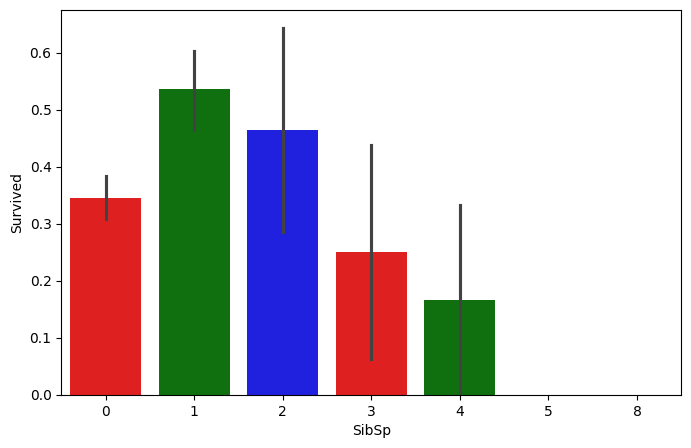

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=df_train["SibSp"],y=df_train["Survived"],palette=["red", "green","blue"])

plt.show()

#Survived

<ipython-input-41-5fdae70a458b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_train["Pclass"],y=df_train["Survived"],palette=["red", "green","blue"])


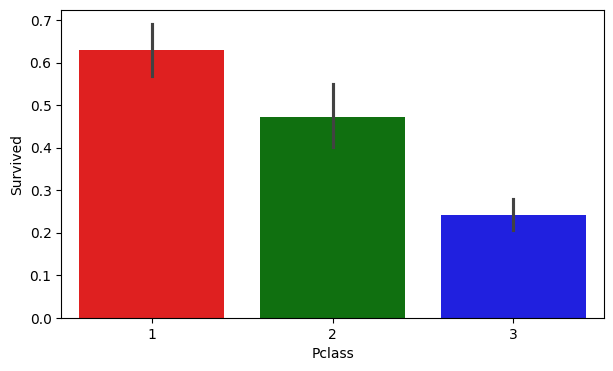

In [ ]:
plt.figure(figsize=(7,4))
sns.barplot(x=df_train["Pclass"],y=df_train["Survived"],palette=["red", "green","blue"])

plt.show()

#Survived

In [ ]:
df_test["Pclass"].unique()

array([3, 2, 1])

<ipython-input-42-f3c4d212a871>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_train["Sex"],y=df_train["Survived"],palette=["red", "green","blue"])
<ipython-input-42-f3c4d212a871>:2: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(x=df_train["Sex"],y=df_train["Survived"],palette=["red", "green","blue"])


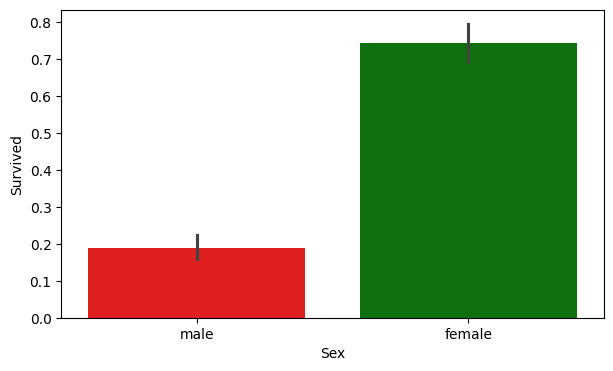

In [ ]:
plt.figure(figsize=(7,4))
sns.barplot(x=df_train["Sex"],y=df_train["Survived"],palette=["red", "green","blue"])

plt.show()

#Survived

<ipython-input-43-f77ade3350b5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_train["Embarked"],y=df_train["Survived"],palette=["red", "green","blue"])


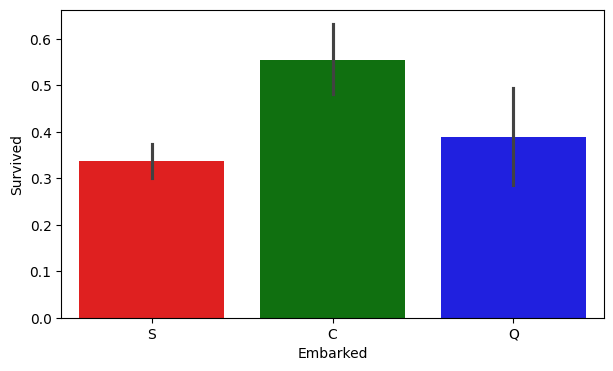

In [ ]:
plt.figure(figsize=(7,4))
sns.barplot(x=df_train["Embarked"],y=df_train["Survived"],palette=["red", "green","blue"])

plt.show()

#Survived

<ipython-input-51-b4b79ce7670d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_train["PassengerId"],y=df_train["Fare"],palette=["red", "green","blue"])
<ipython-input-51-b4b79ce7670d>:2: UserWarning: 
The palette list has fewer values (3) than needed (891) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=df_train["PassengerId"],y=df_train["Fare"],palette=["red", "green","blue"])


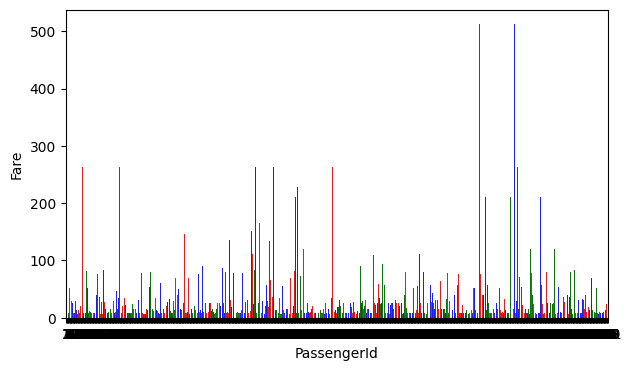

In [ ]:
plt.figure(figsize=(7,4))
sns.barplot(x=df_train["PassengerId"],y=df_train["Fare"],palette=["red", "green","blue"])

plt.show()
#Fare
#Survived

In [ ]:
df_test["Fare"].unique()

array([  7.8292,   7.    ,   9.6875,   8.6625,  12.2875,   9.225 ,
         7.6292,  29.    ,   7.2292,  24.15  ,   7.8958,  26.    ,
        82.2667,  61.175 ,  27.7208,  12.35  ,   7.225 ,   7.925 ,
        59.4   ,   3.1708,  31.6833,  61.3792, 262.375 ,  14.5   ,
        61.9792,  30.5   ,  21.6792,  31.5   ,  20.575 ,  23.45  ,
        57.75  ,   8.05  ,   9.5   ,  56.4958,  13.4167,  26.55  ,
         7.85  ,  13.    ,  52.5542,  29.7   ,   7.75  ,  76.2917,
        15.9   ,  60.    ,  15.0333,  23.    , 263.    ,  15.5792,
        29.125 ,   7.65  ,  16.1   ,  13.5   ,   7.725 ,  21.    ,
         7.8792,  42.4   ,  28.5375, 211.5   ,  25.7   ,  15.2458,
       221.7792,  10.7083,  14.4542,  13.9   ,   7.775 ,  52.    ,
         7.7958,  78.85  ,   7.8542,  55.4417,   8.5167,  22.525 ,
         7.8208,   8.7125,  15.0458,   7.7792,  31.6792,   7.2833,
         6.4375,  16.7   ,  75.2417,  15.75  ,   7.25  ,  23.25  ,
        28.5   ,  25.4667,  46.9   , 151.55  ,  18.    ,  51.8

In [ ]:
df_train["family"]=df_train.Parch+df_train.SibSp
df_train['Is_Alone'] = df_train.family== 0
df_test["family"]=df_test.Parch+df_test.SibSp
df_test['Is_Alone'] = df_test.family== 0

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,Is_Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,True


In [ ]:
df_train["family"].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10])

In [ ]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


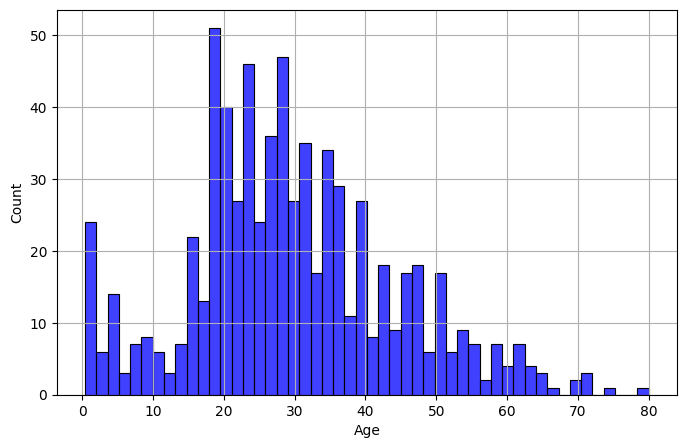

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df_train["Age"], bins=50, color="blue")
plt.grid()
plt.show()

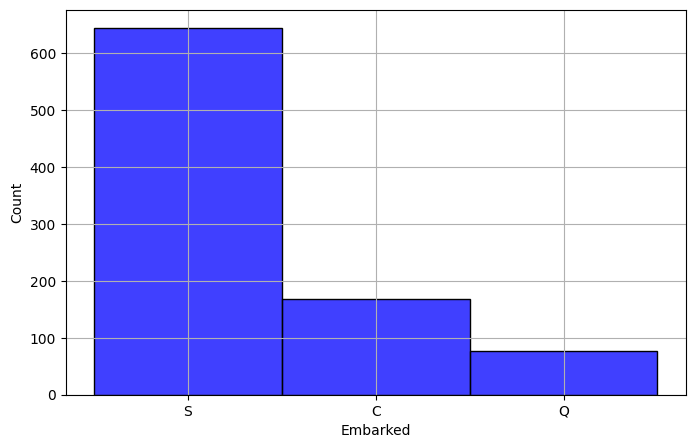

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df_train["Embarked"], bins=50, color="blue")
plt.grid()
plt.show()

In [ ]:
df_train["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

#fillna

In [ ]:
df_train.Embarked.fillna(df_train.Embarked.mode()[0],inplace=True)

In [ ]:
df_train.Cabin.fillna("u",inplace=True)

In [ ]:
df_train.Age.fillna(df_train.Age.median(),inplace=True)

<ipython-input-81-96044cc006db>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.Age.fillna(df_train.Age.median(),inplace=True)


In [ ]:
df_test.Age.fillna(df_test.Age.median(),inplace=True)
df_test.Cabin.fillna("u",inplace=True)
df_test.Embarked.fillna(df_test.Embarked.mode()[0],inplace=True)
df_test.Fare.fillna(df_test.Fare.median(),inplace=True)


<ipython-input-87-6a42b6bcbc66>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test.Age.fillna(df_test.Age.median(),inplace=True)
<ipython-input-87-6a42b6bcbc66>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [ ]:
df_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


In [ ]:
df_train["Ticket"].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

#drop

In [ ]:
df_test.drop(["Name","SibSp","Parch","PassengerId","Ticket"],axis=1,inplace=True)

In [ ]:
df_train.drop(["Name","SibSp","Parch","PassengerId","Ticket"],axis=1,inplace=True)

KeyError: "['Name', 'SibSp', 'Parch', 'PassengerId', 'Ticket'] not found in axis"

In [ ]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,family,Is_Alone
0,0,3,male,22.0,7.2500,B96 B98,S,1,False
1,1,1,female,38.0,71.2833,C85,C,1,False
2,1,3,female,26.0,7.9250,G6,S,0,True
3,1,1,female,35.0,53.1000,C123,S,1,False
4,0,3,male,35.0,8.0500,u,S,0,True


In [ ]:
df_test.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,family,Is_Alone
0,3,male,34.5,7.8292,u,Q,0,True
1,3,female,47.0,7.0000,u,S,1,False
2,2,male,62.0,9.6875,u,Q,0,True
3,3,male,27.0,8.6625,u,S,0,True
4,3,female,22.0,12.2875,u,S,2,False


#CatToNum

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Cabin     891 non-null    object 
 6   Embarked  891 non-null    object 
 7   family    891 non-null    int64  
 8   Is_Alone  891 non-null    bool   
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 56.7+ KB
